In [102]:
import numpy as np
import pandas as pd
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow as  tf
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist


In [103]:
# path='archive/Ground_truth'

In [104]:

# def load_images(directory,image_size=(200,200)):
#     images=[]
#     for filename in os.listdir(path):
#         image_path=os.path.join(directory,filename)
#         image=Image.open(image_path)
#         image=image.resize(image_size)
#         image_array=np.array(image)/255.
#         images.append(image_array)
#     return np.array(images)
        
        

In [105]:
# images=load_images(path)
# images=np.expand_dims(images,axis=-1)

In [106]:
# x_train,x_test=train_test_split(images,test_size=0.2,random_state=101)

In [107]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

4422102/4422102 [==============================] - 10s 2us/step
(60000, 28, 28)
(10000, 28, 28)


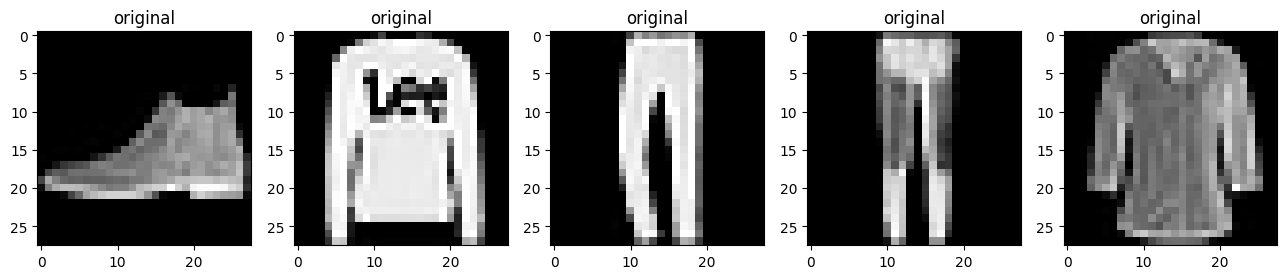

In [108]:
n = 5
plt.figure(figsize=(16, 10))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original")
    plt.imshow(tf.squeeze(x_test[i]))
    plt.gray()
plt.show()

# Vanila Auto Encoder

In [114]:
encoder=keras.models.Sequential([
                keras.layers.Flatten(input_shape=(28,28,1)),
                keras.layers.Dense(100,activation='relu'),
                keras.layers.Dense(30,activation='relu')    
])

In [115]:
decoder=keras.models.Sequential([
        keras.layers.Dense(100,input_shape=[30]),
        keras.layers.Dense(28*28*1,activation='sigmoid'),
        keras.layers.Reshape([28,28,1]) 
] )

# Stacking encoder and decoder

In [116]:
autoencoder=keras.models.Sequential([encoder,decoder])

# Compiling autoencoder

In [117]:
autoencoder.compile(loss='binary_crossentropy',
                   optimizer='rmsprop')

# Fitting autoencoder

In [ ]:
history=autoencoder.fit(x_train,x_train,
               epochs=50,
               validation_data=[x_test,x_test])

Epoch 1/50
1875/1875 [==============================] - 11s 5ms/step - loss: 0.3342 - val_loss: 0.3109
Epoch 2/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3010 - val_loss: 0.3058
Epoch 3/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2933 - val_loss: 0.2929
Epoch 4/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2894 - val_loss: 0.2893
Epoch 5/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2870 - val_loss: 0.2914
Epoch 6/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2854 - val_loss: 0.2861
Epoch 7/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2842 - val_loss: 0.2852
Epoch 8/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2834 - val_loss: 0.2855
Epoch 9/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2827 - val_loss: 0.2862
Epoch 10/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2

In [ ]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

In [ ]:
n = 5
plt.figure(figsize=(10, 6))
for i in range(n):

    # display original + noise
    ax = plt.subplot(2, n, i + 1)
    plt.title("original")
    plt.imshow(tf.squeeze(x_test[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()